In [1]:
import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization


# number of elements
K = 10

# degree of discretization
p = [1,2]
Nd = len(p)

# map of element index to discretization
element_to_discretization = [k % Nd for k in range(0,K)]

# number of flux nodes (equal to p+1)
N_Omega = [p[i] + 1 for i in range(0,Nd)]

# one-dimensional mesh with K elements
mesh = Mesh1D("mesh_1d_test", 0.0, 1.0, K)

# discretization components
quadrature = [mp.LegendreGaussQuadrature(N_Omega[i]-1) for i in range(0,Nd)]
flux_nodes = [np.array([quadrature[i].nodes]) for i in range(0,Nd)]
facet_nodes = [[np.array([[-1.0]]),np.array([[1.0]])] for i in range(0,Nd)]
W = [np.diag(quadrature[i].weights) for i in range(0,Nd)]
W_gamma = [[np.array([[1.0]]),np.array([[1.0]])] for i in range(0,Nd)]

discretization = SpatialDiscretization(mesh, element_to_discretization, p, 
                                       flux_nodes, facet_nodes, W, W_gamma)

In [2]:
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.local_to_bc_index

{(0, 0): 1, (9, 1): 2}

In [3]:
mesh.make_periodic([1,2])

In [4]:
mesh.local_to_local

{(0, 0): (9, 1),
 (0, 1): (1, 0),
 (1, 0): (0, 1),
 (1, 1): (2, 0),
 (2, 0): (1, 1),
 (2, 1): (3, 0),
 (3, 0): (2, 1),
 (3, 1): (4, 0),
 (4, 0): (3, 1),
 (4, 1): (5, 0),
 (5, 0): (4, 1),
 (5, 1): (6, 0),
 (6, 0): (5, 1),
 (6, 1): (7, 0),
 (7, 0): (6, 1),
 (7, 1): (8, 0),
 (8, 0): (7, 1),
 (8, 1): (9, 0),
 (9, 0): (8, 1),
 (9, 1): (0, 0)}

In [5]:
mesh.v

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]])

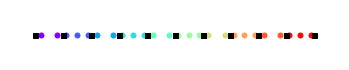

In [6]:
discretization.plot()

In [7]:
discretization.

array([[-0.57735027,  0.57735027]])